# Bidirectional (two-way) ANOVA  +  Post Hoc Test

To identify the most discriminative AUs that vary significantly with emotion, per resident, using bidirectional (two-way) ANOVA, we'll need to:

Test which AUs show statistically significant variation across:

   -Emotions

   -Residents

And possibly their interaction (emotion × resident)

## 1. PyFeat 

### 1.1 Format our DataFrame

The goal is to format our csv files and combine them in one file in this format:

| resident | emotion   | frame | AU01 | AU02 | AU04 | .. |
| -------- | --------- | ----- | ---- | ---- | ---- | ---|
| res1     | happiness | 001   | 0.72 | 0.55 | 0.12 | .. | 
| res1     | happiness | 002   | 0.68 | 0.50 | 0.14 | .. | 
| res1     | sadness   | 001   | 0.10 | 0.22 | 0.50 | .. | 
| res1     | sadness   | 002   | 0.12 | 0.20 | 0.48 | .. | 
| res2     | happiness | 001   | 0.65 | 0.48 | 0.10 | .. |
| res2     | happiness | 002   | 0.63 |  ..  |  ..  | .. | 



In [102]:
import os
import pandas as pd

base_path = "/home/maram/Downloads/PrendreLaParole/newFPS"
residents = ["resident1", "resident2", "resident3"]
emotions = ["happiness", "fear", "surprise", "anger", "disgust", "sadness"]

all_data = []

for resident in residents:
    for emotion in emotions:
        csv_path = os.path.join(base_path, resident, emotion, f"Frames_{emotion}_pyFeat.csv")
        
        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            df['resident'] = resident
            df['emotion'] = emotion
            all_data.append(df)
        else:
            print(f"File not found: {csv_path}")

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)


# List all columns except resident, emotion, frame
au_columns = [col for col in combined_df.columns if col not in ['resident', 'emotion', 'frame']]

# New column order
new_order = ['resident', 'emotion', 'frame'] + au_columns

# Reorder the DataFrame
final_df = combined_df[new_order]

# Optional: save to CSV
final_df.to_csv(os.path.join(base_path,"Frames_all_residents_PyFeat.csv"), index=False)

In [103]:
final_df

,resident,emotion,frame,AU01,AU02,AU04,AU05,AU06,AU07,AU09,...,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
0,resident1,happiness,0,0.544700,0.529393,0.153745,0.321403,0.703002,0.0,0.200630,...,0.538892,0.244208,0.330317,1.0,0.561649,0.034194,0.996596,0.815815,0.091881,0.094148
1,resident1,happiness,1,0.515321,0.496892,0.136554,0.321403,0.694664,1.0,0.203824,...,0.562421,0.292961,0.330508,1.0,0.556919,0.033699,0.993493,0.858440,0.106491,0.080210
2,resident1,happiness,2,0.519810,0.432502,0.169564,0.329499,0.679726,1.0,0.168599,...,0.521844,0.209343,0.261180,1.0,0.542313,0.023665,0.999953,0.798244,0.065630,0.117750
3,resident1,happiness,3,0.516423,0.423585,0.261388,0.323572,0.682241,1.0,0.168034,...,0.485715,0.191654,0.267142,1.0,0.419164,0.016074,0.999639,0.694834,0.221822,0.105238
4,resident1,happiness,4,0.656227,0.595320,0.070104,0.437081,0.788044,0.0,0.302129,...,0.633310,0.332247,0.234914,1.0,0.314617,0.022258,0.999830,0.808447,0.024346,0.104152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,resident3,sadness,58,0.344400,0.295756,0.561043,0.262074,0.299561,0.0,0.510756,...,0.481275,0.643960,0.438711,1.0,0.513510,0.038171,0.997863,0.493560,0.197412,0.930524
1845,resident3,sadness,59,0.399624,0.197289,0.551690,0.279343,0.401363,1.0,0.511936,...,0.297557,0.585549,0.500312,1.0,0.495732,0.034792,0.997800,0.595719,0.160654,0.932944
1846,resident3,sadness,60,0.462669,0.288940,0.514752,0.290084,0.451519,1.0,0.507673,...,0.370205,0.310012,0.426064,1.0,0.519381,0.032859,0.999341,0.666610,0.116790,0.888471
1847,resident3,sadness,61,0.350964,0.237635,0.480190,0.274433,0.370980,0.0,0.526363,...,0.364074,0.608342,0.477155,1.0,0.544721,0.061798,0.995756,0.585341,0.235491,0.921097


### 1.2 Apply  **ANOVA + Post Hoc Test**  on every AU for all residents/emotions

#### 1.2.1 AU1

In [104]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#two way anova without interaction
model = ols('AU01 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F        PR(>F)
C(resident)              3.943755     2.0  244.385360  5.963788e-94
C(emotion)               0.760500     5.0   18.850569  2.813265e-18
C(resident):C(emotion)   3.596369    10.0   44.571737  5.223972e-79
Residual                13.636139  1690.0         NaN           NaN


In [105]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df1_1 = final_df[['AU01', 'emotion']].dropna()   # Drop missing values

# Apply Tukey HSD on AU01 for different emotions
tukey_emotion = pairwise_tukeyhsd(endog=df1_1['AU01'],
                                   groups=df1_1['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0175   0.34 -0.0424  0.0074  False
    anger      fear  -0.0258 0.0146 -0.0485 -0.0032   True
    anger happiness   0.0225 0.1438 -0.0038  0.0488  False
    anger   sadness   0.0777    0.0  0.0469  0.1084   True
    anger  surprise  -0.0069 0.9723 -0.0323  0.0185  False
  disgust      fear  -0.0084 0.9307 -0.0333  0.0165  False
  disgust happiness     0.04 0.0008  0.0117  0.0683   True
  disgust   sadness   0.0951    0.0  0.0627  0.1276   True
  disgust  surprise   0.0106 0.8798 -0.0168   0.038  False
     fear happiness   0.0483    0.0   0.022  0.0747   True
     fear   sadness   0.1035    0.0  0.0728  0.1343   True
     fear  surprise    0.019 0.2719 -0.0064  0.0444  False
happiness   sadness   0.0552    0.0  0.0216  0.0887   True
happiness  surprise  -0.0294 0.0419 -0.0581 -0.0006   Tr

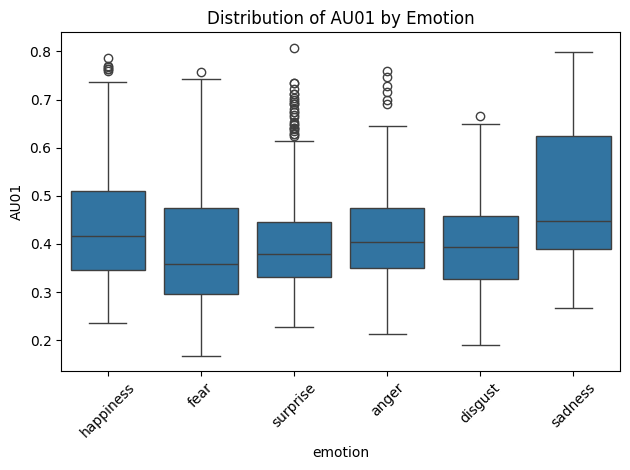

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='emotion', y='AU01', data=df1_1)
plt.title('Distribution of AU01 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.2 AU2

In [107]:
model = ols('AU02 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df          F        PR(>F)
C(resident)              0.640379     2.0  24.743037  2.561873e-11
C(emotion)               3.510791     5.0  54.260094  2.229628e-52
C(resident):C(emotion)   4.080123    10.0  31.529632  2.254069e-56
Residual                21.869612  1690.0        NaN           NaN


In [108]:
df1_2 = final_df[['AU02', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_2['AU02'],
                                   groups=df1_2['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust   -0.035 0.0048 -0.0629 -0.0071   True
    anger      fear  -0.1364    0.0 -0.1618  -0.111   True
    anger happiness  -0.0206 0.3475 -0.0501  0.0089  False
    anger   sadness  -0.0083 0.9837 -0.0427  0.0262  False
    anger  surprise  -0.0249  0.126 -0.0534  0.0036  False
  disgust      fear  -0.1014    0.0 -0.1293 -0.0735   True
  disgust happiness   0.0144 0.7875 -0.0173  0.0461  False
  disgust   sadness   0.0267  0.289 -0.0096  0.0631  False
  disgust  surprise   0.0101 0.9375 -0.0207  0.0408  False
     fear happiness   0.1158    0.0  0.0863  0.1453   True
     fear   sadness   0.1281    0.0  0.0937  0.1626   True
     fear  surprise   0.1115    0.0   0.083    0.14   True
happiness   sadness   0.0123 0.9373 -0.0253  0.0499  False
happiness  surprise  -0.0043 0.9989 -0.0365  0.0279  Fal

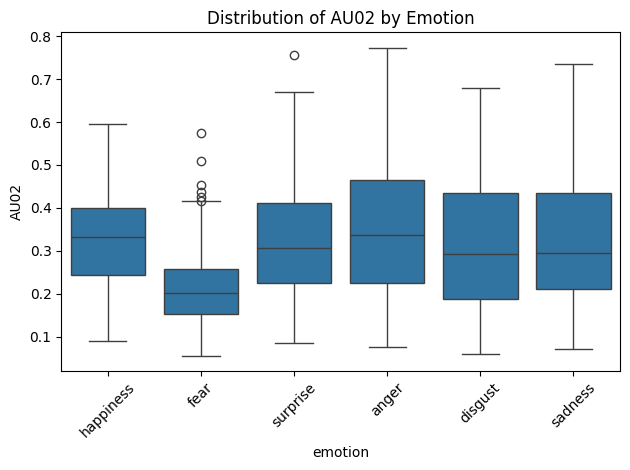

In [109]:
sns.boxplot(x='emotion', y='AU02', data=df1_2)
plt.title('Distribution of AU02 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.3 AU4

In [110]:
model = ols('AU04 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df          F        PR(>F)
C(resident)              2.544971     2.0  46.978536  1.394594e-20
C(emotion)               1.993745     5.0  14.721297  3.722026e-14
C(resident):C(emotion)  10.217240    10.0  37.720736  2.825709e-67
Residual                45.776242  1690.0        NaN           NaN


In [111]:
df1_4 = final_df[['AU04', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_4['AU04'],
                                   groups=df1_4['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust    -0.05 0.0076 -0.0914 -0.0086   True
    anger      fear   0.0109 0.9631 -0.0268  0.0485  False
    anger happiness  -0.0134 0.9531 -0.0571  0.0304  False
    anger   sadness     0.06 0.0106  0.0089  0.1112   True
    anger  surprise  -0.0363 0.1397 -0.0786   0.006  False
  disgust      fear   0.0609 0.0004  0.0195  0.1023   True
  disgust happiness   0.0366 0.2273 -0.0104  0.0837  False
  disgust   sadness   0.1101    0.0  0.0561   0.164   True
  disgust  surprise   0.0137 0.9561 -0.0319  0.0593  False
     fear happiness  -0.0243  0.611  -0.068  0.0195  False
     fear   sadness   0.0492 0.0674  -0.002  0.1003  False
     fear  surprise  -0.0472 0.0184 -0.0894 -0.0049   True
happiness   sadness   0.0734 0.0025  0.0176  0.1292   True
happiness  surprise  -0.0229  0.746 -0.0707  0.0249  Fal

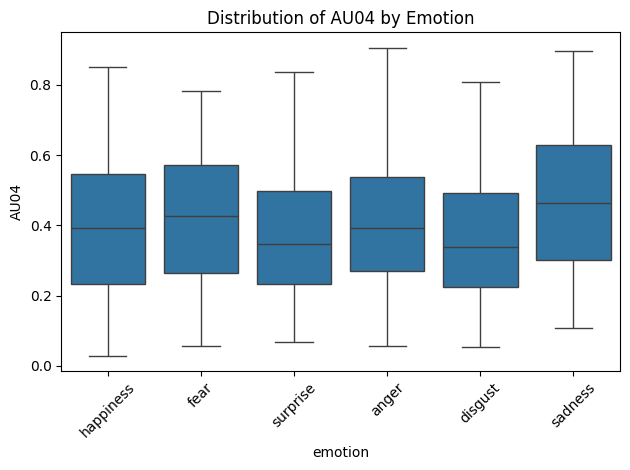

In [113]:
sns.boxplot(x='emotion', y='AU04', data=df1_4)
plt.title('Distribution of AU04 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.4 AU5

In [114]:
model = ols('AU05 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq      df          F        PR(>F)
C(resident)             0.976744     2.0  97.547343  8.086066e-41
C(emotion)              1.767928     5.0  70.625099  3.109543e-67
C(resident):C(emotion)  1.403096    10.0  28.025415  4.465787e-50
Residual                8.461008  1690.0        NaN           NaN


In [115]:
df1_5 = final_df[['AU05', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_5['AU05'],
                                   groups=df1_5['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust   0.0196 0.0217  0.0018  0.0374   True
    anger      fear   -0.027    0.0 -0.0432 -0.0107   True
    anger happiness  -0.0394    0.0 -0.0583 -0.0206   True
    anger   sadness   -0.023 0.0341  -0.045  -0.001   True
    anger  surprise   0.0576    0.0  0.0394  0.0758   True
  disgust      fear  -0.0465    0.0 -0.0643 -0.0287   True
  disgust happiness   -0.059    0.0 -0.0792 -0.0388   True
  disgust   sadness  -0.0426    0.0 -0.0658 -0.0194   True
  disgust  surprise   0.0381    0.0  0.0184  0.0577   True
     fear happiness  -0.0125 0.4079 -0.0313  0.0063  False
     fear   sadness   0.0039 0.9958 -0.0181  0.0259  False
     fear  surprise   0.0846    0.0  0.0664  0.1027   True
happiness   sadness   0.0164 0.3711 -0.0076  0.0404  False
happiness  surprise    0.097    0.0  0.0765  0.1176   Tr

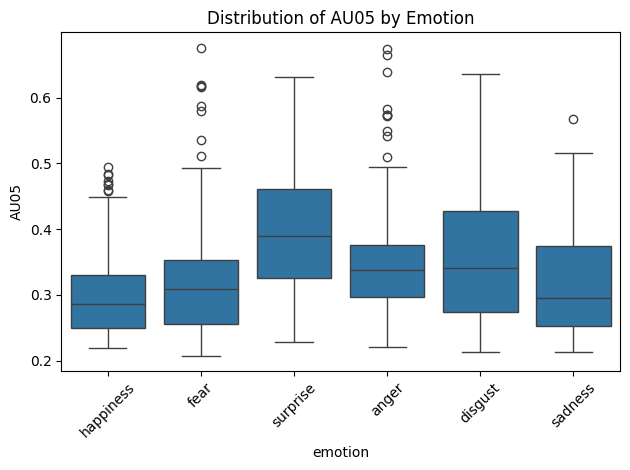

In [116]:
sns.boxplot(x='emotion', y='AU05', data=df1_5)
plt.title('Distribution of AU05 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.5 AU6

In [117]:
model = ols('AU06 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)             39.818117     2.0  959.685320  3.425024e-279
C(emotion)              18.825035     5.0  181.486329  7.218179e-155
C(resident):C(emotion)  16.874956    10.0   81.343109  1.532541e-136
Residual                35.059731  1690.0         NaN            NaN


In [118]:
df1_6 = final_df[['AU06', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_6['AU06'],
                                   groups=df1_6['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0269 0.6764 -0.0787  0.0249  False
    anger      fear   0.0039 0.9999 -0.0433   0.051  False
    anger happiness   0.2124    0.0  0.1576  0.2672   True
    anger   sadness  -0.2223    0.0 -0.2863 -0.1583   True
    anger  surprise  -0.1352    0.0 -0.1881 -0.0823   True
  disgust      fear   0.0308 0.5357  -0.021  0.0826  False
  disgust happiness   0.2393    0.0  0.1804  0.2982   True
  disgust   sadness  -0.1954    0.0 -0.2629 -0.1279   True
  disgust  surprise  -0.1083    0.0 -0.1654 -0.0512   True
     fear happiness   0.2085    0.0  0.1537  0.2633   True
     fear   sadness  -0.2262    0.0 -0.2902 -0.1622   True
     fear  surprise  -0.1391    0.0  -0.192 -0.0862   True
happiness   sadness  -0.4347    0.0 -0.5045 -0.3649   True
happiness  surprise  -0.3476    0.0 -0.4075 -0.2878   Tr

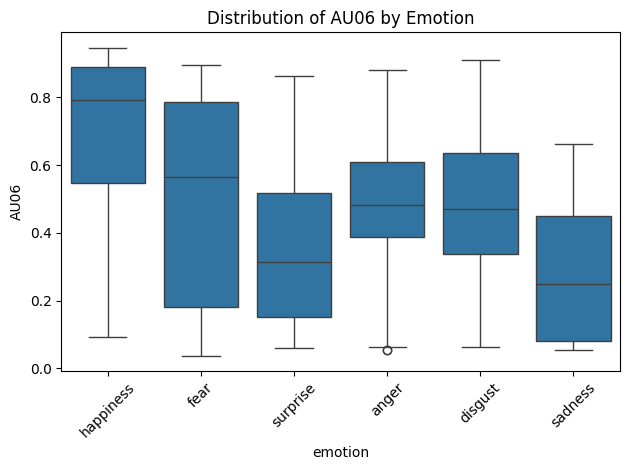

In [119]:
sns.boxplot(x='emotion', y='AU06', data=df1_6)
plt.title('Distribution of AU06 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.6 AU7

In [120]:
model = ols('AU07 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df           F        PR(>F)
C(resident)              68.871228     2.0  203.431882  6.877555e-80
C(emotion)               36.053827     5.0   42.598327  1.937304e-41
C(resident):C(emotion)   23.828310    10.0   14.076816  3.466666e-24
Residual                286.072111  1690.0         NaN           NaN


In [122]:
df1_7 = final_df[['AU07', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_7['AU07'],
                                   groups=df1_7['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust     0.11 0.0346  0.0047  0.2152   True
    anger      fear  -0.1722    0.0 -0.2679 -0.0764   True
    anger happiness   0.2614    0.0  0.1501  0.3727   True
    anger   sadness  -0.2913    0.0 -0.4214 -0.1613   True
    anger  surprise  -0.1155 0.0267  -0.223  -0.008   True
  disgust      fear  -0.2821    0.0 -0.3874 -0.1769   True
  disgust happiness   0.1514 0.0042  0.0319   0.271   True
  disgust   sadness  -0.4013    0.0 -0.5385 -0.2641   True
  disgust  surprise  -0.2255    0.0 -0.3415 -0.1095   True
     fear happiness   0.4335    0.0  0.3222  0.5449   True
     fear   sadness  -0.1192 0.0942 -0.2492  0.0109  False
     fear  surprise   0.0566 0.6625 -0.0509  0.1641  False
happiness   sadness  -0.5527    0.0 -0.6946 -0.4108   True
happiness  surprise  -0.3769    0.0 -0.4985 -0.2554   Tr

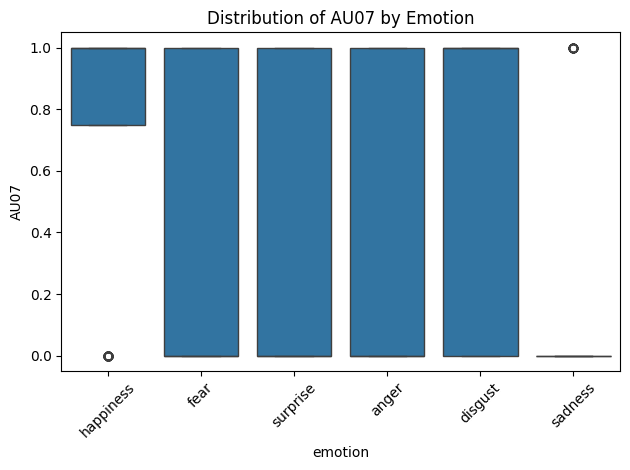

In [123]:
sns.boxplot(x='emotion', y='AU07', data=df1_7)
plt.title('Distribution of AU07 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.7 AU9

In [124]:
model = ols('AU09 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)             20.534079     2.0  581.386210  7.303699e-193
C(emotion)               5.652906     5.0   64.020819   2.626464e-61
C(resident):C(emotion)   6.769353    10.0   38.332453   2.451612e-68
Residual                29.844700  1690.0         NaN            NaN


In [125]:
df1_9 = final_df[['AU09', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_9['AU09'],
                                   groups=df1_9['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0252 0.4934 -0.0661  0.0157  False
    anger      fear   0.0577 0.0001  0.0205  0.0949   True
    anger happiness   0.0706 0.0001  0.0273  0.1138   True
    anger   sadness  -0.0256 0.7001 -0.0761  0.0249  False
    anger  surprise  -0.1057    0.0 -0.1474 -0.0639   True
  disgust      fear   0.0829    0.0   0.042  0.1238   True
  disgust happiness   0.0958    0.0  0.0493  0.1422   True
  disgust   sadness  -0.0004    1.0 -0.0536  0.0529  False
  disgust  surprise  -0.0805    0.0 -0.1256 -0.0354   True
     fear happiness   0.0129 0.9583 -0.0304  0.0561  False
     fear   sadness  -0.0833    0.0 -0.1338 -0.0328   True
     fear  surprise  -0.1634    0.0 -0.2051 -0.1216   True
happiness   sadness  -0.0961    0.0 -0.1512  -0.041   True
happiness  surprise  -0.1763    0.0 -0.2235  -0.129   Tr

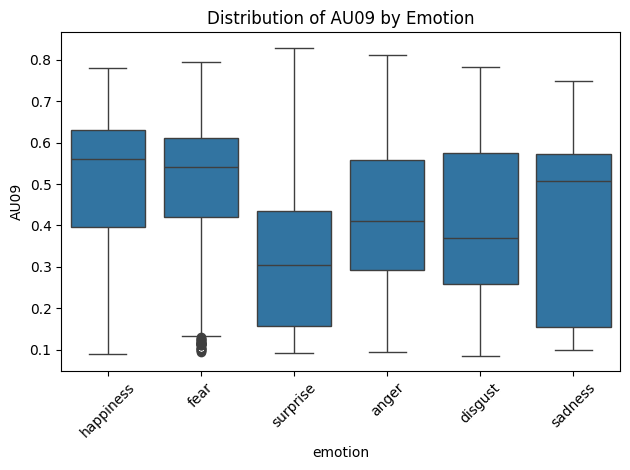

In [126]:
sns.boxplot(x='emotion', y='AU09', data=df1_9)
plt.title('Distribution of AU09 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.8 AU10

In [127]:
model = ols('AU10 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df           F        PR(>F)
C(resident)              35.263914     2.0  234.742118  1.092655e-90
C(emotion)               17.926272     5.0   47.732093  2.722529e-46
C(resident):C(emotion)    2.409881    10.0    3.208383  4.228236e-04
Residual                126.939329  1690.0         NaN           NaN


In [128]:
df1_10 = final_df[['AU10', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_10['AU10'],
                                   groups=df1_10['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust   0.0918 0.0023  0.0224  0.1612   True
    anger      fear  -0.0673 0.0289 -0.1304 -0.0042   True
    anger happiness   0.2513    0.0  0.1779  0.3247   True
    anger   sadness  -0.1068 0.0052 -0.1925 -0.0211   True
    anger  surprise   0.0099 0.9987  -0.061  0.0808  False
  disgust      fear  -0.1591    0.0 -0.2284 -0.0897   True
  disgust happiness   0.1595    0.0  0.0807  0.2384   True
  disgust   sadness  -0.1986    0.0  -0.289 -0.1081   True
  disgust  surprise  -0.0819 0.0278 -0.1583 -0.0054   True
     fear happiness   0.3186    0.0  0.2452   0.392   True
     fear   sadness  -0.0395 0.7769 -0.1252  0.0462  False
     fear  surprise   0.0772 0.0235  0.0063  0.1481   True
happiness   sadness  -0.3581    0.0 -0.4516 -0.2646   True
happiness  surprise  -0.2414    0.0 -0.3215 -0.1613   Tr

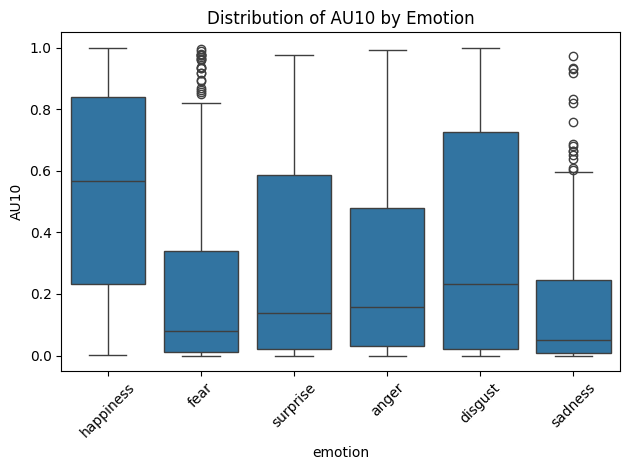

In [129]:
sns.boxplot(x='emotion', y='AU10', data=df1_10)
plt.title('Distribution of AU10 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.9 AU11

In [130]:
model = ols('AU11 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df          F        PR(>F)
C(resident)               8.263659     2.0  18.829496  8.170231e-09
C(emotion)               27.645566     5.0  25.197170  1.425442e-24
C(resident):C(emotion)   15.748892    10.0   7.177056  3.622969e-11
Residual                370.843279  1690.0        NaN           NaN


In [131]:
df1_11 = final_df[['AU11', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_11['AU11'],
                                   groups=df1_11['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0025    1.0 -0.1099   0.105  False
    anger      fear  -0.0835  0.144 -0.1813  0.0142  False
    anger happiness   0.2775    0.0  0.1638  0.3911   True
    anger   sadness  -0.2211    0.0 -0.3539 -0.0883   True
    anger  surprise  -0.0852 0.2313 -0.1949  0.0245  False
  disgust      fear  -0.0811 0.2609 -0.1885  0.0264  False
  disgust happiness   0.2799    0.0  0.1578   0.402   True
  disgust   sadness  -0.2186 0.0001 -0.3587 -0.0786   True
  disgust  surprise  -0.0827 0.3468 -0.2012  0.0357  False
     fear happiness    0.361    0.0  0.2473  0.4747   True
     fear   sadness  -0.1376 0.0372 -0.2703 -0.0048   True
     fear  surprise  -0.0017    1.0 -0.1114  0.1081  False
happiness   sadness  -0.4986    0.0 -0.6434 -0.3537   True
happiness  surprise  -0.3627    0.0 -0.4868 -0.2386   Tr

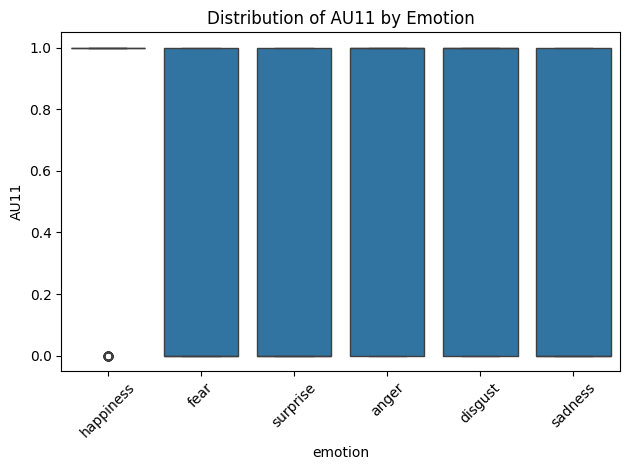

In [132]:
sns.boxplot(x='emotion', y='AU11', data=df1_11)
plt.title('Distribution of AU11 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.10 AU12

In [133]:
model = ols('AU12 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)             40.983903     2.0  599.008059  2.278205e-197
C(emotion)              21.156967     5.0  123.689476  9.344823e-112
C(resident):C(emotion)  12.956580    10.0   37.873873   1.531398e-67
Residual                57.814578  1690.0         NaN            NaN


In [134]:
df1_12 = final_df[['AU12', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_12['AU12'],
                                   groups=df1_12['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0086 0.9982 -0.0657  0.0486  False
    anger      fear   0.0001    1.0 -0.0519  0.0521  False
    anger happiness   0.2577    0.0  0.1972  0.3182   True
    anger   sadness  -0.2241    0.0 -0.2947 -0.1534   True
    anger  surprise   -0.095 0.0001 -0.1534 -0.0366   True
  disgust      fear   0.0087 0.9981 -0.0485  0.0659  False
  disgust happiness   0.2663    0.0  0.2013  0.3312   True
  disgust   sadness  -0.2155    0.0   -0.29  -0.141   True
  disgust  surprise  -0.0865 0.0013 -0.1495 -0.0234   True
     fear happiness   0.2576    0.0  0.1971   0.318   True
     fear   sadness  -0.2242    0.0 -0.2948 -0.1536   True
     fear  surprise  -0.0951 0.0001 -0.1535 -0.0368   True
happiness   sadness  -0.4818    0.0 -0.5588 -0.4047   True
happiness  surprise  -0.3527    0.0 -0.4187 -0.2867   Tr

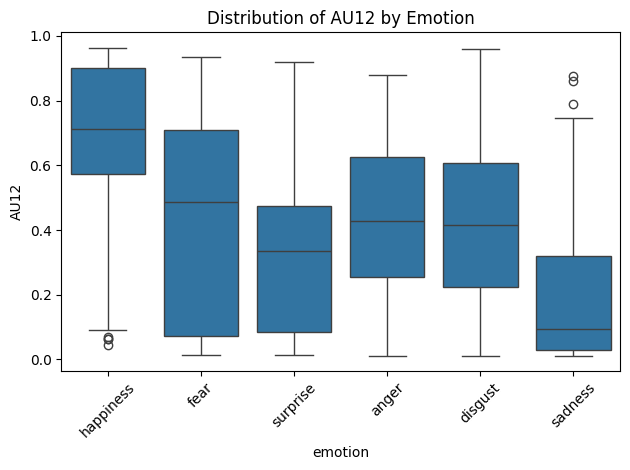

In [135]:
sns.boxplot(x='emotion', y='AU12', data=df1_12)
plt.title('Distribution of AU12 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.11 AU14

In [136]:
model = ols('AU14 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F        PR(>F)
C(resident)              6.455474     2.0  196.493737  1.879486e-77
C(emotion)               5.054696     5.0   61.542566  4.646045e-59
C(resident):C(emotion)   8.547250    10.0   52.032773  2.112030e-91
Residual                27.761067  1690.0         NaN           NaN


In [137]:
df1_14 = final_df[['AU14', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_14['AU14'],
                                   groups=df1_14['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0946    0.0   -0.13 -0.0592   True
    anger      fear   0.0612    0.0   0.029  0.0933   True
    anger happiness   0.0396 0.0304  0.0022  0.0771   True
    anger   sadness  -0.0577 0.0024 -0.1014  -0.014   True
    anger  surprise  -0.0837    0.0 -0.1198 -0.0476   True
  disgust      fear   0.1558    0.0  0.1204  0.1911   True
  disgust happiness   0.1343    0.0  0.0941  0.1744   True
  disgust   sadness   0.0369 0.2002 -0.0092   0.083  False
  disgust  surprise   0.0109 0.9681 -0.0281  0.0499  False
     fear happiness  -0.0215 0.5718 -0.0589  0.0159  False
     fear   sadness  -0.1188    0.0 -0.1625 -0.0751   True
     fear  surprise  -0.1449    0.0  -0.181 -0.1088   True
happiness   sadness  -0.0973    0.0  -0.145 -0.0496   True
happiness  surprise  -0.1234    0.0 -0.1642 -0.0825   Tr

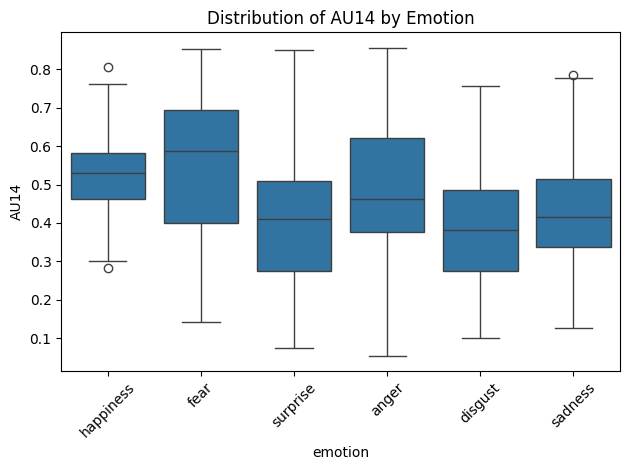

In [138]:
sns.boxplot(x='emotion', y='AU14', data=df1_14)
plt.title('Distribution of AU14 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.12 AU15

In [139]:
model = ols('AU15 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df          F        PR(>F)
C(resident)              3.930898     2.0  80.175330  5.427531e-34
C(emotion)               5.132004     5.0  41.869326  9.569652e-41
C(resident):C(emotion)   5.826015    10.0  23.765697  2.659968e-42
Residual                41.429313  1690.0        NaN           NaN


In [140]:
df1_15 = final_df[['AU15', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_15['AU15'],
                                   groups=df1_15['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0408 0.0321 -0.0795 -0.0021   True
    anger      fear  -0.0778    0.0  -0.113 -0.0426   True
    anger happiness  -0.1628    0.0 -0.2037 -0.1219   True
    anger   sadness   0.0829    0.0  0.0351  0.1307   True
    anger  surprise  -0.0325 0.1766  -0.072   0.007  False
  disgust      fear  -0.0371 0.0694 -0.0758  0.0016  False
  disgust happiness   -0.122    0.0  -0.166 -0.0781   True
  disgust   sadness   0.1236    0.0  0.0732  0.1741   True
  disgust  surprise   0.0083 0.9938 -0.0344  0.0509  False
     fear happiness   -0.085    0.0 -0.1259  -0.044   True
     fear   sadness   0.1607    0.0  0.1129  0.2085   True
     fear  surprise   0.0453 0.0138  0.0058  0.0849   True
happiness   sadness   0.2456    0.0  0.1935  0.2978   True
happiness  surprise   0.1303    0.0  0.0856   0.175   Tr

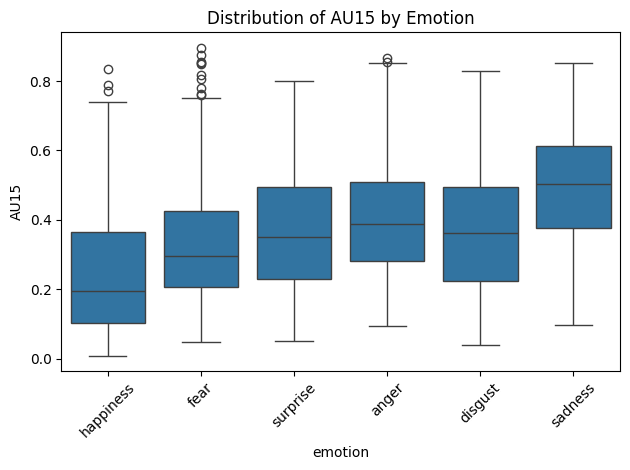

In [141]:
sns.boxplot(x='emotion', y='AU15', data=df1_15)
plt.title('Distribution of AU15 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.13 AU17

In [142]:
model = ols('AU17 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)              3.014551     2.0  156.108997   6.125845e-63
C(emotion)               8.679410     5.0  179.785838  1.142053e-153
C(resident):C(emotion)   7.556243    10.0   78.260241  4.866653e-132
Residual                16.317418  1690.0         NaN            NaN


In [143]:
df1_17 = final_df[['AU17', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_17['AU17'],
                                   groups=df1_17['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0612    0.0 -0.0893 -0.0332   True
    anger      fear  -0.0314  0.006  -0.057 -0.0059   True
    anger happiness  -0.1877    0.0 -0.2173  -0.158   True
    anger   sadness   0.0837    0.0  0.0491  0.1184   True
    anger  surprise  -0.0148 0.6835 -0.0434  0.0139  False
  disgust      fear   0.0298   0.03  0.0017  0.0578   True
  disgust happiness  -0.1265    0.0 -0.1583 -0.0946   True
  disgust   sadness   0.1449    0.0  0.1084  0.1815   True
  disgust  surprise   0.0465 0.0003  0.0155  0.0774   True
     fear happiness  -0.1562    0.0 -0.1859 -0.1266   True
     fear   sadness   0.1152    0.0  0.0805  0.1498   True
     fear  surprise   0.0167 0.5566 -0.0119  0.0453  False
happiness   sadness   0.2714    0.0  0.2336  0.3092   True
happiness  surprise   0.1729    0.0  0.1405  0.2053   Tr

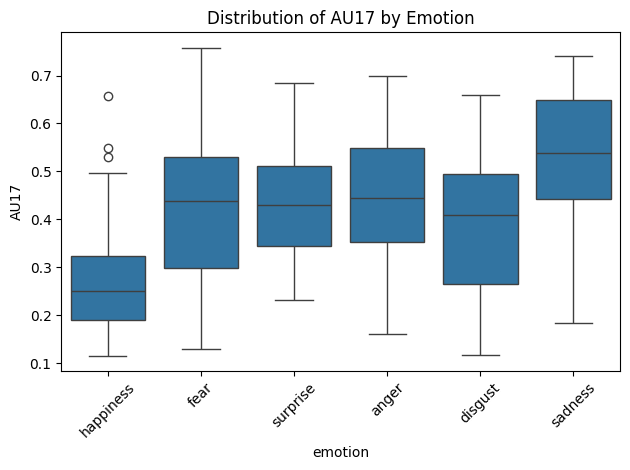

In [144]:
sns.boxplot(x='emotion', y='AU17', data=df1_17)
plt.title('Distribution of AU17 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.14 AU20

In [145]:
model = ols('AU20 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df          F        PR(>F)
C(resident)              29.851421     2.0  98.922190  2.359573e-41
C(emotion)               67.516283     5.0  89.494682  1.121947e-83
C(resident):C(emotion)   54.788870    10.0  36.312074  8.063481e-65
Residual                254.992846  1690.0        NaN           NaN


In [146]:
df1_20 = final_df[['AU20', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_20['AU20'],
                                   groups=df1_20['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust   0.0865 0.1316 -0.0131  0.1862  False
    anger      fear   0.1899    0.0  0.0992  0.2806   True
    anger happiness   0.4341    0.0  0.3287  0.5396   True
    anger   sadness  -0.1838 0.0003 -0.3069 -0.0606   True
    anger  surprise  -0.1712    0.0  -0.273 -0.0694   True
  disgust      fear   0.1034 0.0369  0.0037   0.203   True
  disgust happiness   0.3476    0.0  0.2344  0.4609   True
  disgust   sadness  -0.2703    0.0 -0.4002 -0.1404   True
  disgust  surprise  -0.2577    0.0 -0.3676 -0.1479   True
     fear happiness   0.2443    0.0  0.1389  0.3497   True
     fear   sadness  -0.3736    0.0 -0.4968 -0.2505   True
     fear  surprise  -0.3611    0.0 -0.4629 -0.2593   True
happiness   sadness  -0.6179    0.0 -0.7523 -0.4836   True
happiness  surprise  -0.6054    0.0 -0.7205 -0.4903   Tr

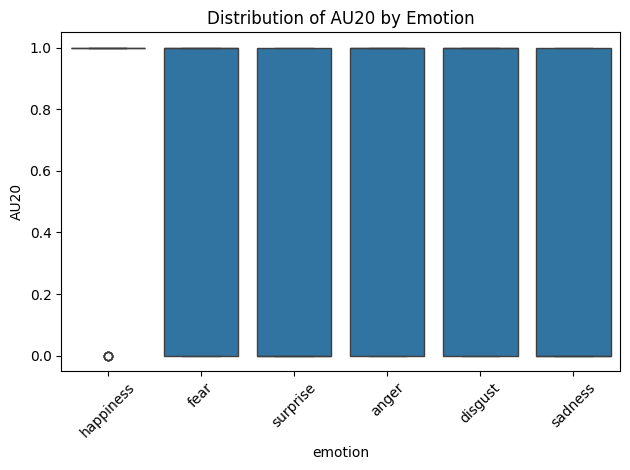

In [147]:
sns.boxplot(x='emotion', y='AU20', data=df1_20)
plt.title('Distribution of AU20 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.15 AU23

In [148]:
model = ols('AU23 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)             14.940210     2.0  463.381551  3.575535e-161
C(emotion)               8.046597     5.0   99.828445   2.187239e-92
C(resident):C(emotion)  13.237969    10.0   82.117062  1.157894e-137
Residual                27.244238  1690.0         NaN            NaN


In [149]:
df1_23 = final_df[['AU23', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_23['AU23'],
                                   groups=df1_23['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0102 0.9795 -0.0504  0.0301  False
    anger      fear   0.0166 0.7884   -0.02  0.0533  False
    anger happiness  -0.1321    0.0 -0.1747 -0.0895   True
    anger   sadness   0.1744    0.0  0.1246  0.2241   True
    anger  surprise  -0.0173 0.8358 -0.0584  0.0238  False
  disgust      fear   0.0268 0.4039 -0.0135   0.067  False
  disgust happiness  -0.1219    0.0 -0.1677 -0.0762   True
  disgust   sadness   0.1845    0.0  0.1321   0.237   True
  disgust  surprise  -0.0072 0.9974 -0.0515  0.0372  False
     fear happiness  -0.1487    0.0 -0.1913 -0.1061   True
     fear   sadness   0.1577    0.0   0.108  0.2075   True
     fear  surprise  -0.0339 0.1728 -0.0751  0.0072  False
happiness   sadness   0.3064    0.0  0.2522  0.3607   True
happiness  surprise   0.1147    0.0  0.0683  0.1612   Tr

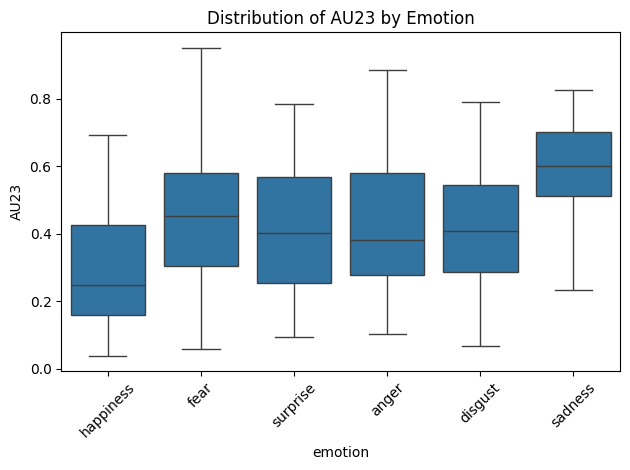

In [150]:
sns.boxplot(x='emotion', y='AU23', data=df1_23)
plt.title('Distribution of AU23 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.16 AU24

In [151]:
model = ols('AU24 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)             28.133792     2.0  417.294627  5.165341e-148
C(emotion)              23.427070     5.0  138.992863  1.143606e-123
C(resident):C(emotion)  32.504662    10.0   96.425119  8.132105e-158
Residual                56.969470  1690.0         NaN            NaN


In [152]:
df1_24 = final_df[['AU24', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_24['AU24'],
                                   groups=df1_24['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.1198    0.0 -0.1784 -0.0611   True
    anger      fear   -0.006 0.9995 -0.0594  0.0473  False
    anger happiness  -0.3274    0.0 -0.3894 -0.2654   True
    anger   sadness  -0.0018    1.0 -0.0742  0.0707  False
    anger  surprise  -0.0021    1.0  -0.062  0.0578  False
  disgust      fear   0.1138    0.0  0.0551  0.1724   True
  disgust happiness  -0.2076    0.0 -0.2743  -0.141   True
  disgust   sadness    0.118 0.0002  0.0416  0.1944   True
  disgust  surprise   0.1177    0.0   0.053  0.1823   True
     fear happiness  -0.3214    0.0 -0.3834 -0.2594   True
     fear   sadness   0.0042    1.0 -0.0682  0.0767  False
     fear  surprise   0.0039    1.0  -0.056  0.0638  False
happiness   sadness   0.3256    0.0  0.2466  0.4047   True
happiness  surprise   0.3253    0.0  0.2576   0.393   Tr

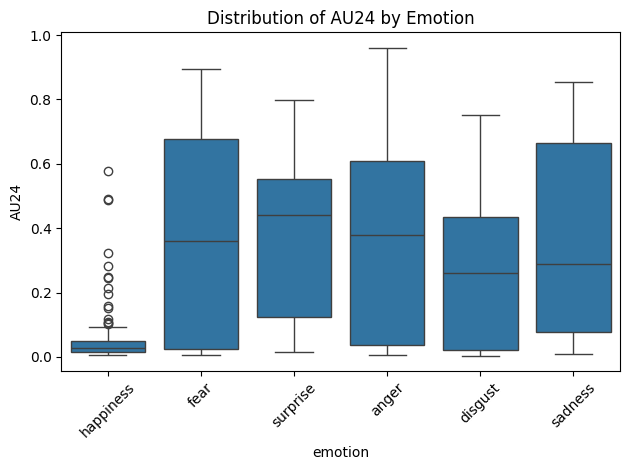

In [153]:
sns.boxplot(x='emotion', y='AU24', data=df1_24)
plt.title('Distribution of AU24 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.17 AU25

In [154]:
model = ols('AU25 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)             32.572482     2.0  381.671296  1.654199e-137
C(emotion)              25.360676     5.0  118.866494  6.387796e-108
C(resident):C(emotion)  43.080880    10.0  100.960899  5.523745e-164
Residual                72.113748  1690.0         NaN            NaN


In [155]:
df1_25 = final_df[['AU25', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_25['AU25'],
                                   groups=df1_25['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust   0.1413    0.0  0.0756  0.2071   True
    anger      fear   0.0979    0.0  0.0381  0.1577   True
    anger happiness   0.2417    0.0  0.1721  0.3112   True
    anger   sadness  -0.2166    0.0 -0.2979 -0.1354   True
    anger  surprise   0.0227 0.9296 -0.0445  0.0898  False
  disgust      fear  -0.0434 0.4133 -0.1091  0.0224  False
  disgust happiness   0.1004 0.0018  0.0257  0.1751   True
  disgust   sadness   -0.358    0.0 -0.4436 -0.2723   True
  disgust  surprise  -0.1187    0.0 -0.1911 -0.0462   True
     fear happiness   0.1437    0.0  0.0742  0.2133   True
     fear   sadness  -0.3146    0.0 -0.3958 -0.2334   True
     fear  surprise  -0.0753 0.0176 -0.1424 -0.0081   True
happiness   sadness  -0.4583    0.0 -0.5469 -0.3697   True
happiness  surprise   -0.219    0.0 -0.2949 -0.1431   Tr

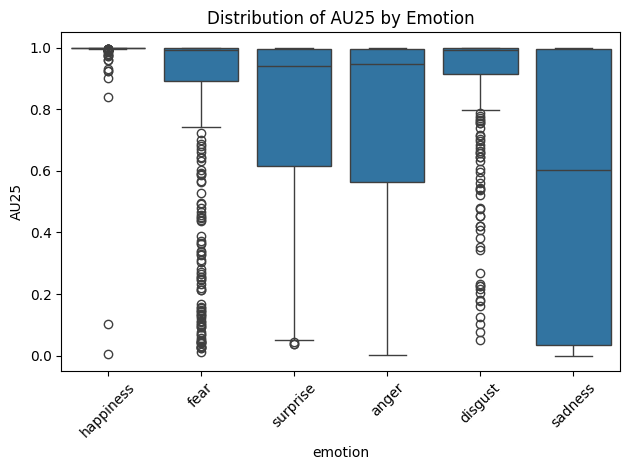

In [156]:
sns.boxplot(x='emotion', y='AU25', data=df1_25)
plt.title('Distribution of AU25 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.18 AU26

In [157]:
model = ols('AU26 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F         PR(>F)
C(resident)             17.553818     2.0  327.198813  7.723953e-121
C(emotion)              17.204926     5.0  128.278222  2.282320e-115
C(resident):C(emotion)  17.619356    10.0   65.684086  4.277012e-113
Residual                45.333220  1690.0         NaN            NaN


In [158]:
df1_26 = final_df[['AU26', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_26['AU26'],
                                   groups=df1_26['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust   0.1773    0.0  0.1288  0.2258   True
    anger      fear   0.0458 0.0368  0.0017    0.09   True
    anger happiness   0.2093    0.0   0.158  0.2607   True
    anger   sadness  -0.0438 0.2958 -0.1037  0.0161  False
    anger  surprise  -0.0667 0.0018 -0.1163 -0.0172   True
  disgust      fear  -0.1315    0.0   -0.18  -0.083   True
  disgust happiness    0.032 0.5601 -0.0231  0.0872  False
  disgust   sadness  -0.2211    0.0 -0.2843 -0.1579   True
  disgust  surprise   -0.244    0.0 -0.2975 -0.1905   True
     fear happiness   0.1635    0.0  0.1122  0.2149   True
     fear   sadness  -0.0896 0.0003 -0.1496 -0.0297   True
     fear  surprise  -0.1125    0.0 -0.1621  -0.063   True
happiness   sadness  -0.2531    0.0 -0.3185 -0.1877   True
happiness  surprise  -0.2761    0.0 -0.3321   -0.22   Tr

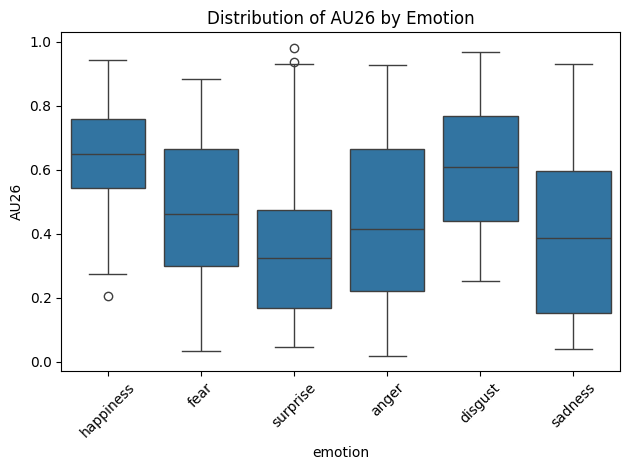

In [159]:
sns.boxplot(x='emotion', y='AU26', data=df1_26)
plt.title('Distribution of AU26 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.19 AU28

In [160]:
model = ols('AU28 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq      df           F        PR(>F)
C(resident)              9.195211     2.0  258.889570  8.351444e-99
C(emotion)               4.657367     5.0   52.450946  1.061161e-50
C(resident):C(emotion)   4.754758    10.0   26.773880  8.331700e-48
Residual                30.012616  1690.0         NaN           NaN


In [161]:
df1_28 = final_df[['AU28', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_28['AU28'],
                                   groups=df1_28['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0016    1.0 -0.0375  0.0342  False
    anger      fear   0.0573    0.0  0.0247  0.0899   True
    anger happiness  -0.0699    0.0 -0.1078 -0.0319   True
    anger   sadness   0.1765    0.0  0.1322  0.2208   True
    anger  surprise   0.0142 0.8782 -0.0224  0.0508  False
  disgust      fear   0.0589    0.0  0.0231  0.0948   True
  disgust happiness  -0.0682    0.0  -0.109 -0.0275   True
  disgust   sadness   0.1781    0.0  0.1314  0.2249   True
  disgust  surprise   0.0158 0.8631 -0.0237  0.0554  False
     fear happiness  -0.1272    0.0 -0.1651 -0.0892   True
     fear   sadness   0.1192    0.0  0.0749  0.1635   True
     fear  surprise  -0.0431 0.0104 -0.0797 -0.0065   True
happiness   sadness   0.2464    0.0   0.198  0.2947   True
happiness  surprise   0.0841    0.0  0.0427  0.1255   Tr

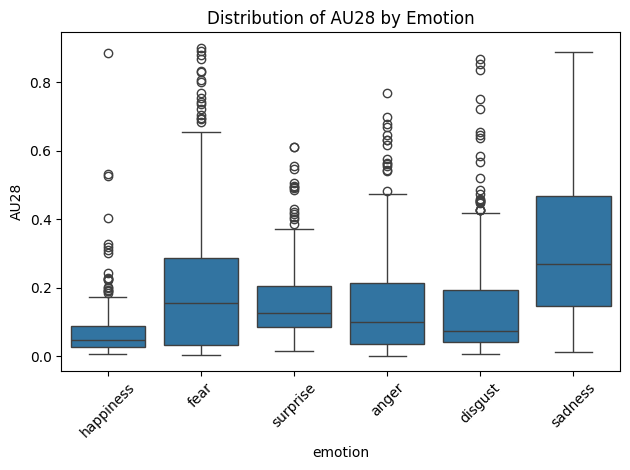

In [162]:
sns.boxplot(x='emotion', y='AU28', data=df1_28)
plt.title('Distribution of AU28 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.2.20 AU43

In [163]:
model = ols('AU43 ~ C(resident) + C(emotion) + C(resident):C(emotion)', data=final_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df            F         PR(>F)
C(resident)             151.033155     2.0  4394.430904   0.000000e+00
C(emotion)                2.681085     5.0    31.203328   1.826007e-30
C(resident):C(emotion)   13.970029    10.0    81.293843  1.806881e-136
Residual                 29.041989  1690.0          NaN            NaN


In [164]:
df1_43 = final_df[['AU43', 'emotion']].dropna()

tukey_emotion = pairwise_tukeyhsd(endog=df1_43['AU43'],
                                   groups=df1_43['emotion'],
                                   alpha=0.05)

print(tukey_emotion)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0287 0.8871  -0.104  0.0467  False
    anger      fear  -0.1811    0.0 -0.2497 -0.1126   True
    anger happiness  -0.0532 0.3993 -0.1329  0.0265  False
    anger   sadness  -0.1066 0.0141 -0.1996 -0.0135   True
    anger  surprise   -0.184    0.0 -0.2609 -0.1071   True
  disgust      fear  -0.1524    0.0 -0.2278 -0.0771   True
  disgust happiness  -0.0245 0.9644 -0.1101  0.0611  False
  disgust   sadness  -0.0779 0.2098 -0.1761  0.0203  False
  disgust  surprise  -0.1553    0.0 -0.2384 -0.0723   True
     fear happiness   0.1279 0.0001  0.0482  0.2076   True
     fear   sadness   0.0746 0.2005 -0.0185  0.1676  False
     fear  surprise  -0.0029    1.0 -0.0798  0.0741  False
happiness   sadness  -0.0534 0.6649 -0.1549  0.0482  False
happiness  surprise  -0.1308 0.0003 -0.2178 -0.0438   Tr

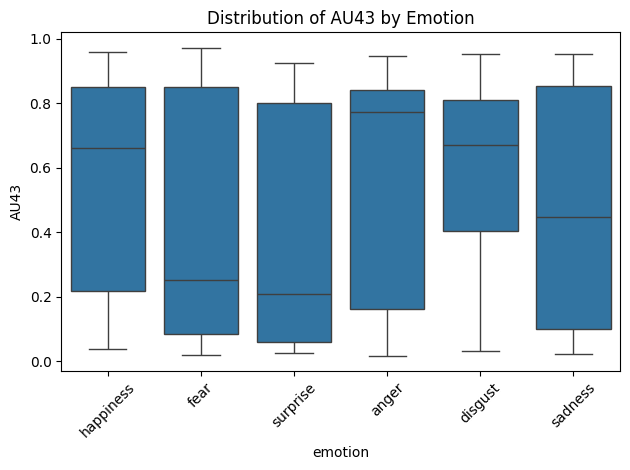

In [165]:
sns.boxplot(x='emotion', y='AU43', data=df1_43)
plt.title('Distribution of AU43 by Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.3 1 Way ANOVA for each rsident
Perform a separate analysis for each resident to find their most discriminative Action Units (AUs) using one-way ANOVA.

For each resident, we determine which AUs vary significantly across different emotions — this tells us which AUs are the most expressive or discriminative for that resident.

In [65]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

aus = ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU11', 'AU12', 'AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU24', 'AU25', 'AU26', 'AU28', 'AU43']

# Loop through each resident
for resident in final_df['resident'].unique():
    print(f"\nResident: {resident}")
    df_res = final_df[final_df['resident'] == resident]

    for au in aus:
        try:
            model = ols(f'{au} ~ C(emotion)', data=df_res).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            p_value = anova_table['PR(>F)'][0]
            if p_value < 0.05:
                print(f"{au} is significant (p = {p_value:.4f})")
        except Exception as e:
            print(f"Error processing {au} for {resident}: {e}")


Resident: resident1
AU01 is significant (p = 0.0000)
AU02 is significant (p = 0.0000)
AU04 is significant (p = 0.0000)
AU05 is significant (p = 0.0001)
AU06 is significant (p = 0.0000)
AU07 is significant (p = 0.0005)
AU09 is significant (p = 0.0005)
AU10 is significant (p = 0.0000)
AU11 is significant (p = 0.0000)
AU12 is significant (p = 0.0000)
AU14 is significant (p = 0.0000)
AU15 is significant (p = 0.0000)
AU17 is significant (p = 0.0000)
AU20 is significant (p = 0.0000)
AU23 is significant (p = 0.0000)
AU24 is significant (p = 0.0000)
AU25 is significant (p = 0.0000)
AU26 is significant (p = 0.0000)
AU28 is significant (p = 0.0000)
AU43 is significant (p = 0.0001)

Resident: resident2
AU01 is significant (p = 0.0000)
AU02 is significant (p = 0.0000)
AU04 is significant (p = 0.0000)
AU05 is significant (p = 0.0000)
AU06 is significant (p = 0.0000)
AU07 is significant (p = 0.0000)
AU09 is significant (p = 0.0000)
AU10 is significant (p = 0.0000)
AU11 is significant (p = 0.0000)
A

/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treatin

AU15 is significant (p = 0.0000)
AU17 is significant (p = 0.0000)
AU20 is significant (p = 0.0000)
AU23 is significant (p = 0.0000)
AU24 is significant (p = 0.0000)
AU25 is significant (p = 0.0000)
AU26 is significant (p = 0.0000)
AU28 is significant (p = 0.0000)
AU43 is significant (p = 0.0000)

Resident: resident3
AU01 is significant (p = 0.0000)
AU02 is significant (p = 0.0000)
AU04 is significant (p = 0.0000)
AU05 is significant (p = 0.0000)
AU06 is significant (p = 0.0000)
AU07 is significant (p = 0.0000)
AU09 is significant (p = 0.0000)
AU10 is significant (p = 0.0000)
AU11 is significant (p = 0.0000)
AU12 is significant (p = 0.0000)
AU14 is significant (p = 0.0000)
AU15 is significant (p = 0.0000)
AU17 is significant (p = 0.0000)
AU20 is significant (p = 0.0000)
AU23 is significant (p = 0.0000)
AU24 is significant (p = 0.0000)
AU25 is significant (p = 0.0000)
AU26 is significant (p = 0.0000)
AU28 is significant (p = 0.0000)
AU43 is significant (p = 0.0000)


/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
/tmp/ipykernel_17073/635434561.py:15: FutureWarning: Series.__getitem__ treatin

### ANOVA on PEDFE Dataset

#### Combine Data

In [66]:
import pandas as pd
import os

# Define base path and emotions
base_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS"
emotions = ["Happiness", "Fear", "Surprise", "Anger", "Disgust", "Sadness"]

# List to collect dataframes
dfs = []

# Loop through each emotion folder
for emotion in emotions:
    file_path = os.path.join(base_path, emotion, f"{emotion}_AUs_mean.csv")  # assuming file is named mean.csv
    df = pd.read_csv(file_path, header=None, names=['AU', 'value'])  # assuming no header
    df['emotion'] = emotion
    dfs.append(df)

# Combine all into one dataframe
combined_df = pd.concat(dfs)

# Pivot so each emotion is one row and each AU is a column
final_df = combined_df.pivot(index='emotion', columns='AU', values='value').reset_index()

# Save the final combined file
final_df.to_csv(os.path.join(base_path,"combined-AUs.csv"), index=False)

print("✅ Combined CSV saved as combined_emotions.csv")


✅ Combined CSV saved as combined_emotions.csv


#### One way ANOVA 

In [67]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load combined AU data
file_path = "/home/maram/Downloads/PrendreLaParole/PEDFE/newFPS/combined-AUs.csv"
df = pd.read_csv(file_path)

# Melt the dataframe: each row will be one AU value, with corresponding emotion and AU name
df_melted = df.melt(id_vars='emotion', var_name='AU', value_name='value')

# Run ANOVA for each AU
for au in df_melted['AU'].unique():
    try:
        df_au = df_melted[df_melted['AU'] == au]
        model = ols('value ~ C(emotion)', data=df_au).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        p_value = anova_table['PR(>F)'][0]
        if p_value < 0.05:
            print(f"{au} is significant (p = {p_value:.4f})")
        else:
            print(f"{au} is NOT significant (p = {p_value:.4f})")
    except Exception as e:
        print(f"Error processing {au}: {e}")


Error processing Unnamed: 1: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU01: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU02: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU04: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU05: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU06: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU07: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU09: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU10: r_matrix performs f_test for using dimensions that are asymptotically non-normal
Error processing AU11: r_matrix performs f_test for using 

/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/home/maram/.local/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_re

## 2. OpenFace

### 2.1 Format the Data

In [3]:
import os
import pandas as pd

In [9]:
base_path = "/home/maram/Downloads/PrendreLaParole/newFPS"
residents = ["resident1", "resident2", "resident3"]
emotions = ["happiness", "fear", "surprise", "anger", "disgust", "sadness"]

all_data = []
i=1
for resident in residents:
    for emotion in emotions:
            csv_path = os.path.join(base_path, resident, emotion,f"OpenFaceOutput", f"{i}-{emotion}.csv")
            
            if os.path.exists(csv_path):
                df = pd.read_csv(csv_path)
                df = df[[col for col in df.columns if col.endswith('_r') or col == "frame"]]
                df["resident"] = resident
                df["emotion"] = emotion
                all_data.append(df)
            else:
                print(f"CSV not found: {csv_path}")
    i=i+1

# Combine all rows into one DataFrame
combined_df2 = pd.concat(all_data, ignore_index=True)

# Reorder columns: AU columns first, then 'resident', 'emotion'
au_cols = [col for col in combined_df2.columns if col not in ["resident", "emotion"]]
combined_df2 = combined_df2[ ["resident", "emotion"] + au_cols]
# Save if needed
combined_df2.to_csv(os.path.join(base_path,"Frames_all_residents_OpenFace.csv"), index=False)

print("Combined dataset created with shape:", combined_df2.shape)

Combined dataset created with shape: (1849, 20)


In [11]:
combined_df2

,resident,emotion,frame,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,resident1,happiness,1,0.48,0.33,0.99,0.00,0.84,0.00,0.00,0.97,1.65,1.39,0.00,0.65,0.00,0.04,0.00,0.57,0.00
1,resident1,happiness,2,0.55,0.41,0.91,0.00,1.00,0.00,0.00,0.97,1.86,1.23,0.00,0.56,0.00,0.02,0.00,0.66,0.00
2,resident1,happiness,3,0.48,0.47,0.78,0.00,1.09,0.00,0.00,0.96,2.02,1.06,0.00,0.46,0.00,0.01,0.00,0.64,0.00
3,resident1,happiness,4,0.35,0.26,0.56,0.00,1.21,0.01,0.00,0.92,2.03,1.03,0.00,0.24,0.00,0.01,0.05,0.65,0.00
4,resident1,happiness,5,0.28,0.17,0.66,0.00,1.29,0.50,0.00,1.05,1.96,1.18,0.00,0.12,0.10,0.00,0.05,0.68,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,resident3,sadness,59,0.29,0.04,1.42,0.17,0.71,2.96,0.04,2.31,0.89,0.71,0.87,1.36,0.00,0.00,0.12,0.99,0.15
1845,resident3,sadness,60,0.25,0.04,1.39,0.39,0.78,3.00,0.02,2.18,0.96,0.82,0.93,1.59,0.00,0.00,0.11,1.04,0.18
1846,resident3,sadness,61,0.23,0.00,1.38,0.38,0.78,3.07,0.00,2.11,0.98,0.86,0.93,1.82,0.10,0.00,0.23,0.95,0.23
1847,resident3,sadness,62,0.14,0.00,1.49,0.44,0.73,2.90,0.00,1.97,0.90,0.89,0.95,2.11,0.13,0.00,0.34,0.94,0.36


### 2.2 Apply ANOVA on every AU for each resident/emotion

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

aus = [
    "AU01_r", "AU02_r", "AU04_r", "AU05_r", "AU06_r", "AU07_r", "AU09_r", "AU10_r", "AU12_r", "AU14_r", "AU15_r", "AU17_r", "AU20_r", "AU23_r", "AU25_r", "AU26_r",  "AU45_r"
]

#### 2.2.1 Resident 1

**ANOVA**

In [17]:
for au in aus:
    df_filtered = combined_df2[[au, 'emotion', 'resident']].dropna()

    if df_filtered[au].nunique() > 1 and df_filtered['emotion'].nunique() > 1 and df_filtered['resident'].nunique() > 1:
        print(f"\nTwo-way ANOVA with interaction for {au}:\n")
        formula = f'{au} ~ C(emotion) + C(resident) + C(emotion):C(resident)'
        model = ols(formula, data=df_filtered).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)
    else:
        print(f"\nSkipped {au}: not enough variation in data.\n")



Two-way ANOVA with interaction for AU01_r:

                            sum_sq      df          F        PR(>F)
C(emotion)                9.549269     5.0  12.805244  2.933997e-12
C(resident)              14.753475     2.0  49.459767  1.202375e-21
C(emotion):C(resident)    8.647747    10.0   5.798167  1.218834e-08
Residual                273.086730  1831.0        NaN           NaN

Two-way ANOVA with interaction for AU02_r:

                            sum_sq      df         F        PR(>F)
C(emotion)                1.560513     5.0  4.885462  1.913176e-04
C(resident)               0.157602     2.0  1.233505  2.915119e-01
C(emotion):C(resident)    3.991605    10.0  6.248215  1.823659e-09
Residual                116.971479  1831.0       NaN           NaN

Two-way ANOVA with interaction for AU04_r:

                            sum_sq      df           F         PR(>F)
C(emotion)               27.538169     5.0   64.772033   2.163516e-62
C(resident)             107.152625     2.0  630.07

**Post Hoc Test (Tukey)**

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [19]:
for au in aus:
    df_filtered = combined_df2[combined_df2['resident'] == 'resident1'][[au, 'emotion']].dropna()

    if df_filtered[au].nunique() > 1 and df_filtered['emotion'].nunique() > 1:
        print(f"\nTukey HSD for {au} (resident1):\n")
        tukey = pairwise_tukeyhsd(endog=df_filtered[au],
                                  groups=df_filtered['emotion'],
                                  alpha=0.05)
        print(tukey)
    else:
        print(f"\nSkipped {au}: not enough variation for Tukey test.\n")


Tukey HSD for AU01_r (resident1):

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.1311 0.8757 -0.4687  0.2065  False
    anger      fear  -0.3688 0.0478 -0.7355 -0.0021   True
    anger happiness  -0.6108 0.0002 -1.0025 -0.2191   True
    anger   sadness  -0.4774 0.0013 -0.8232 -0.1315   True
    anger  surprise  -0.3548 0.0583 -0.7168  0.0071  False
  disgust      fear  -0.2377 0.2924 -0.5629  0.0875  False
  disgust happiness  -0.4797 0.0017 -0.8328 -0.1266   True
  disgust   sadness  -0.3462 0.0139 -0.6477 -0.0447   True
  disgust  surprise  -0.2237 0.3417 -0.5436  0.0961  False
     fear happiness   -0.242 0.4538  -0.623   0.139  False
     fear   sadness  -0.1086 0.9379 -0.4423  0.2252  False
     fear  surprise    0.014    1.0 -0.3365  0.3644  False
happiness   sadness   0.1335 0.8969 -0.2275  0.4945  False
happiness  surprise 

#### 2.2.2 Resident 2

**Post Hoc Test (Tukey)**

In [21]:
for au in aus:
    df_filtered = combined_df2[combined_df2['resident'] == 'resident2'][[au, 'emotion']].dropna()

    if df_filtered[au].nunique() > 1 and df_filtered['emotion'].nunique() > 1:
        print(f"\nTukey HSD for {au} (resident2):\n")
        tukey = pairwise_tukeyhsd(endog=df_filtered[au],
                                  groups=df_filtered['emotion'],
                                  alpha=0.05)
        print(tukey)
    else:
        print(f"\nSkipped {au}: not enough variation for Tukey test.\n")


Tukey HSD for AU01_r (resident2):

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
    anger   disgust  -0.0696 0.8345 -0.2349  0.0956  False
    anger      fear  -0.1251 0.0226 -0.2393 -0.0108   True
    anger happiness  -0.2639    0.0 -0.4042 -0.1236   True
    anger   sadness  -0.2474 0.0001 -0.3984 -0.0963   True
    anger  surprise  -0.2068 0.0001 -0.3386 -0.0751   True
  disgust      fear  -0.0554 0.8964 -0.2047  0.0939  False
  disgust happiness  -0.1943 0.0146 -0.3643 -0.0242   True
  disgust   sadness  -0.1777 0.0529 -0.3568  0.0013  False
  disgust  surprise  -0.1372 0.1559 -0.3003  0.0259  False
     fear happiness  -0.1388  0.014 -0.2599 -0.0178   True
     fear   sadness  -0.1223 0.0937 -0.2557  0.0111  False
     fear  surprise  -0.0818 0.2862 -0.1929  0.0293  False
happiness   sadness   0.0165 0.9997 -0.1397  0.1728  False
happiness  surprise 

#### 2.2.1 Resident 3

**Post Hoc Test (Tukey)**

In [22]:
for au in aus:
    df_filtered = combined_df2[combined_df2['resident'] == 'resident3'][[au, 'emotion']].dropna()

    if df_filtered[au].nunique() > 1 and df_filtered['emotion'].nunique() > 1:
        print(f"\nTukey HSD for {au} (resident3):\n")
        tukey = pairwise_tukeyhsd(endog=df_filtered[au],
                                  groups=df_filtered['emotion'],
                                  alpha=0.05)
        print(tukey)
    else:
        print(f"\nSkipped {au}: not enough variation for Tukey test.\n")


Tukey HSD for AU01_r (resident3):

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
    anger   disgust  -0.0713 0.1345 -0.1537 0.0112  False
    anger      fear  -0.0654  0.278 -0.1536 0.0227  False
    anger happiness  -0.0495 0.6496 -0.1422 0.0433  False
    anger   sadness  -0.1162  0.057 -0.2343  0.002  False
    anger  surprise  -0.0459 0.6377  -0.131 0.0392  False
  disgust      fear   0.0058    1.0 -0.0912 0.1028  False
  disgust happiness   0.0218 0.9899 -0.0794  0.123  False
  disgust   sadness  -0.0449 0.9088 -0.1698   0.08  False
  disgust  surprise   0.0254 0.9726 -0.0688 0.1196  False
     fear happiness    0.016 0.9981 -0.0899 0.1219  False
     fear   sadness  -0.0508 0.8707 -0.1795  0.078  False
     fear  surprise   0.0195 0.9934 -0.0797 0.1188  False
happiness   sadness  -0.0667 0.6997 -0.1987 0.0652  False
happiness  surprise   0.0036    1.0 